In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')

In [2]:
df=pd.read_excel("book1.xlsx")
df.head()

,CAR NO,Name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,1,Maruti Alto 800 LXI Opt,2023,410000,10000,Petrol,Individual,Manual,First Owner,19.03 kmpl,999 CC,71.01bhp,96Nm,5.0
1,2,Skoda Slavia 1.0 TSI Ambition,2023,1350000,10000,Petrol,Individual,Manual,First Owner,14.08 kmpl,1956 CC,167.67bhp,350nm,5.0
2,3,BMW 3 Series Gran Limousine 320Ld Luxury Line,2023,5800000,1000,Diesel,Dealer,Automatic,First Owner,18.15 kmpl,998 CC,118.35bhp,172Nm,5.0
3,4,MG ZS EV Exclusive,2023,2650000,10000,Electric,Dealer,Automatic,First Owner,32.52 kmpl,998 CC,58.33bhp,78Nm,5.0
4,5,Tata Punch Adventure,2023,715000,10000,Petrol,Individual,Manual,First Owner,12.15 kmpl,1451 CC,141bhp,250Nm,5.0


In [3]:
df.shape

(8148, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8148 entries, 0 to 8147
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CAR NO         8148 non-null   int64  
 1   Name           8148 non-null   object 
 2   year           8148 non-null   int64  
 3   selling_price  8148 non-null   int64  
 4   km_driven      8148 non-null   int64  
 5   fuel           8148 non-null   object 
 6   seller_type    8148 non-null   object 
 7   transmission   8148 non-null   object 
 8   owner          8148 non-null   object 
 9   mileage        7927 non-null   object 
 10  engine         7927 non-null   object 
 11  max_power      7933 non-null   object 
 12  torque         7926 non-null   object 
 13  seats          7927 non-null   float64
dtypes: float64(1), int64(4), object(9)
memory usage: 891.3+ KB


In [5]:
df.drop(columns=['CAR NO','Name','owner','year','mileage','torque'],inplace=True)
df.head()

,selling_price,km_driven,fuel,seller_type,transmission,engine,max_power,seats
0,410000,10000,Petrol,Individual,Manual,999 CC,71.01bhp,5.0
1,1350000,10000,Petrol,Individual,Manual,1956 CC,167.67bhp,5.0
2,5800000,1000,Diesel,Dealer,Automatic,998 CC,118.35bhp,5.0
3,2650000,10000,Electric,Dealer,Automatic,998 CC,58.33bhp,5.0
4,715000,10000,Petrol,Individual,Manual,1451 CC,141bhp,5.0


In [6]:
df.isnull().sum()

selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
engine           221
max_power        215
seats            221
dtype: int64

In [7]:
df.dropna(inplace=True)

In [8]:
df.isnull().sum()

selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
engine           0
max_power        0
seats            0
dtype: int64

In [13]:
df['engine']=df['engine'].str.replace('CC','')
df['max_power']=df['max_power'].str.replace('bhp','')

df.sample()

,selling_price,km_driven,fuel,seller_type,transmission,engine,max_power,seats
3881,625000,50000,Diesel,0,Manual,1248,74,5.0


In [14]:
df['seller_type']=pd.factorize(df['seller_type'])[0]
df['fuel']=pd.factorize(df['fuel'])[0]
df['transmission']=pd.factorize(df['transmission'])[0]

df.head()


,selling_price,km_driven,fuel,seller_type,transmission,engine,max_power,seats
0,410000,10000,0,0,0,999,71.01,5.0
1,1350000,10000,0,0,0,1956,167.67,5.0
2,5800000,1000,1,1,1,998,118.35,5.0
3,2650000,10000,2,1,1,998,58.33,5.0
4,715000,10000,0,0,0,1451,141,5.0


In [16]:
df.describe()

,selling_price,km_driven,fuel,seller_type,transmission,seats
count,7.927000e+03,7.927000e+03,7927.000000,7927.000000,7927.000000,7927.000000
mean,6.516141e+05,6.904632e+04,0.580926,0.199950,2.861991,5.415668
std,8.158652e+05,5.679429e+04,0.580384,0.468552,0.361366,0.958604
min,2.999900e+04,1.000000e+00,0.000000,0.000000,0.000000,2.000000
25%,2.700000e+05,3.400000e+04,0.000000,0.000000,3.000000,5.000000
50%,4.500000e+05,6.000000e+04,1.000000,0.000000,3.000000,5.000000
75%,6.900000e+05,9.500000e+04,1.000000,0.000000,3.000000,5.000000
max,1.000000e+07,2.360457e+06,4.000000,2.000000,3.000000,14.000000


In [18]:
df['selling_price'].corr(df['km_driven'])

-0.2234591570667488

In [20]:
df['selling_price'].corr(df['transmission'])

-0.5616405764083324

In [21]:
df['selling_price'].corr(df['seats'])

0.04018361776354285

In [22]:
df['selling_price'].corr(df['fuel'])

0.14545566195147802

In [41]:
#x=df[['']]
X=df[['km_driven']]
y=df['selling_price']


X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1)

model=LinearRegression()
model.fit(X_train,y_train)
predictions=model.predict(X_test)

from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,predictions)

724779305350.3713

<function matplotlib.pyplot.show(close=None, block=None)>

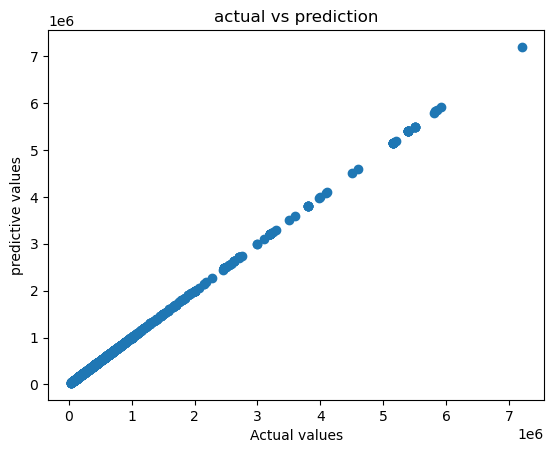

In [38]:
train_score = model.score(X_train,y_train)
test_score=model.score(X_test,y_test)

predictions=model.predict(X_test)
#sns.scatterplot(x=y_test,y=predictions)
plt.scatter(y_test,predictions)
plt.xlabel('Actual values')
plt.ylabel('predictive values')
plt.title('actual vs prediction')
plt.show

In [26]:
df1=y_test
df1.head()

3003    1000000
4174     330000
4879     200000
552      860000
3875     600000
Name: selling_price, dtype: int64

In [29]:
predictions[:5]

array([775813.96633731, 509566.81250298, 719271.27620164, 736746.64817652,
       509566.81250298])